# Intrusion Detection System
-----------------

## Load Preprocessed Data

In [17]:
import pandas as pd

# load dataset
df = pd.read_csv('../data/preprocessed/binary_min_max_combined.csv')
df.shape
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.837186,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.840070,1.016667e-06,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.840085,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.705516,3.916666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.837156,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.00101,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
# check for NaN values
print(f"NaN Values : {df.isnull().sum().sum()}")

# print Label value counts
print(df[' Label'].value_counts())

NaN Values : 0
 Label
0    2271320
1     556556
Name: count, dtype: int64


## Create Small Dataset

In [19]:
# # create df with N samples of each class which holds at least N samples
# N = 2000
# small_df = pd.DataFrame()
# for label in df[' Label'].unique():
#     if df[df[' Label'] == label].shape[0] >= N:
#         small_df = pd.concat([small_df, df[df[' Label'] == label].sample(N)], ignore_index=True)
#     else:
#         small_df = pd.concat([small_df, df[df[' Label'] == label]], ignore_index=True)

# print(small_df[' Label'].value_counts())
# print('Shape: ', small_df.shape)

## Refactor Data - Remove Nan and Inf

In [20]:
# import numpy as np

# small_df = df

# # shuffle data
# small_df = small_df.sample(frac=1).reset_index(drop=True)
# print("Shuffled data:")
# print(small_df.head(2))

# # remove nan and inf values
# print("Checking for NaN values:", np.isnan(small_df).sum().sum())
# print("Checking for Inf values:", np.isinf(small_df).sum().sum())

# # remove NaN and Inf values
# print("Removing NaN and Inf values...")
# small_df = small_df.replace([np.inf, -np.inf], np.nan)
# small_df = small_df.dropna()

# print("Checking for NaN values:", np.isnan(small_df).sum().sum())
# print("Checking for Inf values:", np.isinf(small_df).sum().sum())
# print()

## Shuffle Data

In [21]:
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)
print("Shuffled data:")
print(df.head(2))


Shuffled data:
    Destination Port   Flow Duration   Total Fwd Packets  \
0           0.001221         0.82020            0.000032   
1           0.000809         0.00042            0.000005   

    Total Backward Packets  Total Length of Fwd Packets  \
0                 0.000021                     0.000028   
1                 0.000007                     0.000007   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                  1.769005e-05                0.014424   
1                  3.478510e-07                0.001692   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                0.000000                 0.007659                0.017723   
1                0.018065                 0.007070                0.000000   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                    1.0     0.000009          0.0     0.000009   
1  ...                    1.0     0.000000          0.0     0.000000 

## Split Data

In [22]:
from sklearn.model_selection import train_test_split

# split data
X = df.drop(columns=[' Label'])
y = df[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Creation

In [23]:
# Create DNN model from tensorflow
import setuptools.dist # needed to avoid error
import tensorflow as tf
from tensorflow import keras

# define the keras model
# TODO: test with 40, 40, 20 and simple adam optimizer
model = keras.Sequential()
model.add(keras.layers.Dense(50, input_dim=X_train.shape[1], activation='relu')) # hidden layer
model.add(keras.layers.Dense(30, activation='relu')) # hidden layer
model.add(keras.layers.Dense(10, activation='relu')) # hidden layer
model.add(keras.layers.Dense(1, activation='sigmoid')) # output layer
# set learning rate
opt = keras.optimizers.Adam(learning_rate=0.001)
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/home/felix/Documents/Uni/Master Arbeit/Python/xai-assisted-intrusion-detection-system/.env/lib64/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Training

In [24]:
# fit the keras model on the dataset
model.fit(X, y, validation_split=0.25, epochs=10, batch_size=100)

Epoch 1/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.9552 - loss: 0.1055 - val_accuracy: 0.9791 - val_loss: 0.0460
Epoch 2/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.9791 - loss: 0.0466 - val_accuracy: 0.9799 - val_loss: 0.0499
Epoch 3/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.9810 - loss: 0.0420 - val_accuracy: 0.9787 - val_loss: 0.0427
Epoch 4/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9820 - loss: 0.0401 - val_accuracy: 0.9825 - val_loss: 0.0391
Epoch 5/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9830 - loss: 0.0385 - val_accuracy: 0.9841 - val_loss: 0.0367
Epoch 6/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.9833 - loss: 0.0377 - val_accuracy: 0.9849 - val_loss: 0.0363
Epoch 7/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.9840 - loss: 0.0364 - val_accuracy: 0.9829 - val_loss: 0.0400
Epoch 8/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 

## Result Visualization

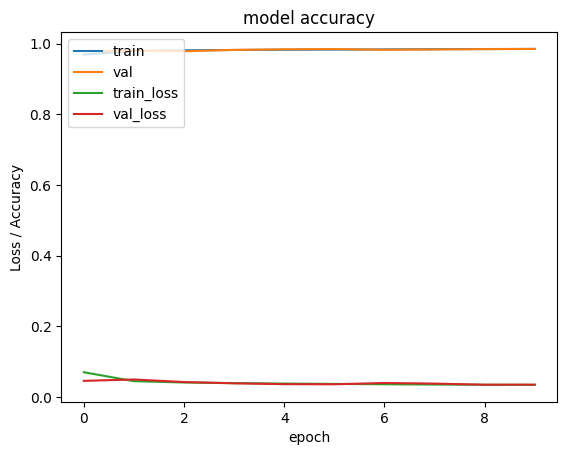

In [25]:
import matplotlib.pyplot as plt

history = model.history.history
# plot loss / accuracy vs epoch for train acc, validation acc, train loss, validation loss
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss / Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train_loss', 'val_loss'], loc='upper left')
plt.show()


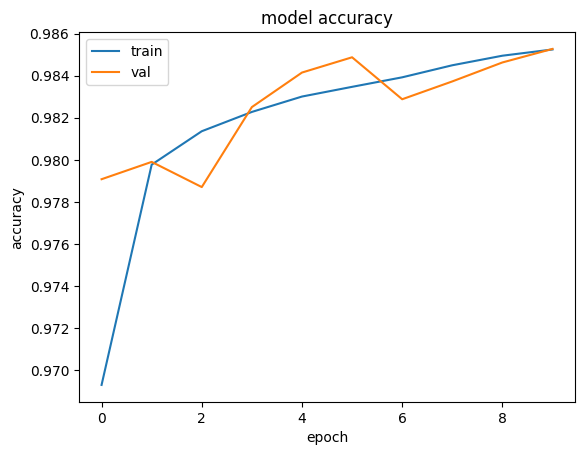

In [26]:
# plot training and validation accuracy over epochs
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
# print accuracy, precision, recall and f1-score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


# accuracy
print(f"Accuracy BENIGN: {accuracy_score(y_test[y_test == 0], y_pred[y_test == 0]):.2f}")
print(f"Accuracy ATTACK: {accuracy_score(y_test[y_test == 1], y_pred[y_test == 1]):.2f}")
print(f"Macro AVG Accuracy: {(accuracy_score(y_test[y_test == 0], y_pred[y_test == 0]) + accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])) / 2:.2f}")
print(f"Weighted AVG Accuracy: {accuracy_score(y_test, y_pred):.2f}")
# precision, recall, f1-score
print(classification_report(y_test, y_pred, target_names=['BENIGN', 'ATTACK']))


22093/22093 ━━━━━━━━━━━━━━━━━━━━ 21s 936us/step
Accuracy BENIGN: 0.99
Accuracy ATTACK: 0.98
Macro AVG Accuracy: 0.98
Weighted AVG Accuracy: 0.99
              precision    recall  f1-score   support

      BENIGN       0.99      0.99      0.99    567709
      ATTACK       0.95      0.98      0.96    139260

    accuracy                           0.99    706969
   macro avg       0.97      0.98      0.98    706969
weighted avg       0.99      0.99      0.99    706969



## Export Model

In [28]:
# export model
model.save('../models/ids_dnn.keras')